# Clase 2: Usando Generator Functions y Closures

Vamos a revisar el modelo de generacion de paths de GBM pero usando feautures del lenguage más específicos para aumentar la productividad.

Primero realizamos los imports necesarios

In [1]:
from math import exp, sqrt
from random import seed, gauss

from matplotlib.pyplot import plot

Ahora replanteamos el generador de GBM usando closures. 

Esto consiste en definir una función que actúe de fábrica (factory) para retornar otra función parametrizada y con "memoria" que permita limpiar el diseño original que requería llamadas sucesivas a una función con muchos parámetros y además el mantenimiento del estado en una variable temporal.

In [2]:
def gbm_closure(s0, delta_t, mu, sigma):
    """Genera proceso Geometric Brownian Motion usando closure.

    Parámetros:
        st -- valor del stock inicial
        delta_t -- tamaño del paso (en fraccción de año)
        mu -- retorno anual promedio proyectado del stock
        sigma -- volatilidad anual proyectada del stock
    """
    st = s0

    def gen_func():
        nonlocal st
        st *= exp((mu - .5 * sigma ** 2) * delta_t + sigma * sqrt(delta_t) * gauss(0., 1.))
        return st

    return gen_func

Planteamos entonces la simulación utilizando esta nueva técnica.

Target alcanzado. Toma de ganancia a un precio de 130.28


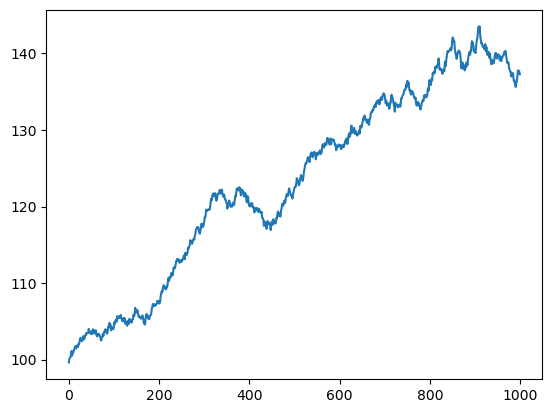

In [3]:
seed(1234) # Comentar esto para obtener aleatoriedad

gen_closure = gbm_closure(100, 1/365, .1, .05)

for _ in range(1000):
    s = gen_closure()
    if s >= 130.:
        print(f'Target alcanzado. Toma de ganancia a un precio de {s:.2f}')
        break

else:
    print(f'Target no alcanzado. Precio final: {s:.2f}')


gen_closure = gbm_closure(100, 1/365, .1, .05) # Necesitamos reiniciar el closure
plot([gen_closure() for _ in range(1000)])

Ahora vamos a seguir mejorando esta implementación mediante el uso de una función generadora.

Vamos a tener que incorporar un nuevo parámetro que controle por la cantidad de simulaciones a realizar. De esta forma toda la lógica de estado queda contenida dentro de este nuevo diseño.

In [4]:
def gbm_generator(s0, n_jumps, delta_t, mu, sigma):
    """Genera proceso Geometric Brownian Motion usando generadores.

    Parámetros:
        st -- valor del stock inicial
        n_jumps -- número de saltos a simular
        delta_t -- tamaño del paso (en fraccción de año)
        mu -- retorno anual promedio proyectado del stock
        sigma -- volatilidad anual proyectada del stock
    """
    st = s0
    jump = 0

    while jump < n_jumps:
        st *= exp((mu - .5 * sigma ** 2) * delta_t + sigma * sqrt(delta_t) * gauss(0., 1.))
        jump += 1
        yield st

Si bien requier algo más de conocmiento de lenguage ya que aparece la palabra `yield`, el diseño final de la simulación es mucho más expresivo y compacto.

Target alcanzado. Toma de ganancia a un precio de 130.28


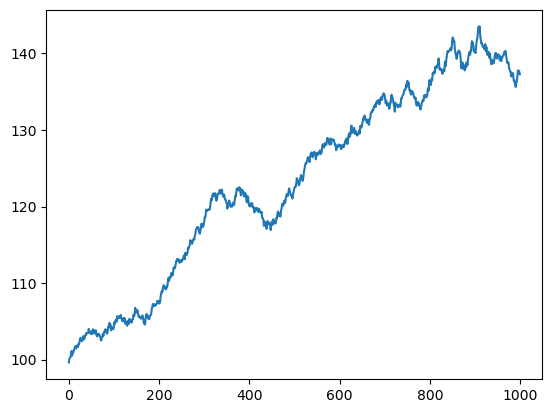

In [5]:
seed(1234) # Comentar esto para obtener aleatoriedad

for s in gbm_generator(100., 1000, 1/365, .1, .05):
    if s >= 130.:
        print(f'Target alcanzado. Toma de ganancia a un precio de {s:.2f}')
        break

else:
    print(f'Target no alcanzado. Precio final: {s:.2f}')

plot([s for s in gbm_generator(100., 1000, 1/365, .1, .05)])